# Customer Analysis BiPi

## Instrucciones/preguntas:

Dado el dataset que se adjunta, contestar las siguientes preguntas:

- ¿Qué método de pandas utilizarías para cargar la información en un dataframe?

- ¿Qué alternativa a pandas podrías utilizar?

- ¿Qué procedimientos harías para hacer una limpieza de los datos?

Escribe un script en Python apoyado en pandas y en cualquier librería de graficación que conozcas que en tiempo de ejecución realice lo siguiente:

Nota: El script tiene que funcionar sin tener el dataset en local. Es decir, debes subir el dataset a algún sitio (git, drive...) y ponerlo en modo público.


1. Calcular el número y porcentaje sobre el total absoluto de Mujeres monoparentales que han gastado más de 15.000 dólares.

2. Calcular cuántos abogados (M/F) hay en el dataset que tengan mayor experiencia laboral que la media de ingenieros hombres.

3. Dibuja la distribución de abogados en función de su gasto anual (utiliza franjas de gasto) y de su sexo.

4. Añade algún análisis que creas que puede ser interesante explicando por pantalla el resultado del mismo

## Importación de librerías

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Carga de los datos

In [2]:
# Leer dataset desde github y almacenarlo en un dataframe de pandas

dataset_url = "https://raw.githubusercontent.com/kimnegrette3/Python-SQL-Customer-Analysis/main/customers.csv"
customers = pd.read_csv(dataset_url)
customers.head()

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6


## Limpieza y Transformación

In [3]:
# Revisamos el tipo de datos de cada atributo y el total de registros y valores nulos
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              2000 non-null   int64 
 1   Gender                  2000 non-null   object
 2   Age                     2000 non-null   int64 
 3   Annual Income ($)       2000 non-null   int64 
 4   Spending Score (1-100)  2000 non-null   int64 
 5   Profession              1965 non-null   object
 6   Work Experience         2000 non-null   int64 
 7   Family Size             2000 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 125.1+ KB


Los tipos de datos de las variables parecen correctos, y solo se observan nulos en la variable 'Profession'. Solo cambiaría el tipo de dato del CustomerID para hacerlo object y que no haya problemas después.

In [4]:
# Verificamos los nulos
customers.isnull().sum()

CustomerID                 0
Gender                     0
Age                        0
Annual Income ($)          0
Spending Score (1-100)     0
Profession                35
Work Experience            0
Family Size                0
dtype: int64

In [5]:
# Verificamos si hay registros duplicados
customers.duplicated().sum()

0

In [6]:
# Revisamos las estadísticas descriptivas generales de las variables numéricas
customers.describe().round(2)

,CustomerID,Age,Annual Income ($),Spending Score (1-100),Work Experience,Family Size
count,2000.00,2000.00,2000.00,2000.00,2000.00,2000.00
mean,1000.50,48.96,110731.82,50.96,4.10,3.77
std,577.49,28.43,45739.54,27.93,3.92,1.97
min,1.00,0.00,0.00,0.00,0.00,1.00
25%,500.75,25.00,74572.00,28.00,1.00,2.00
50%,1000.50,48.00,110045.00,50.00,3.00,4.00
75%,1500.25,73.00,149092.75,75.00,7.00,5.00
max,2000.00,99.00,189974.00,100.00,17.00,9.00


La distribución de las variables numéricas parece no tener muchos errores o outlies, excepto por la edad 'Age' que tiene un mínimo de cero (0.00) que deben ser nulos y un máximo de 99, pero ese valor puede ser real. Revisaré las distribuciones con más detalle en histogramas.

In [7]:
# Verificamos cuántos registros tienen 'Age' = 0
len(customers[customers['Age'] == 0])

24

In [8]:
customers[customers['Age'] == 0]

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
211,212,Female,0,22000,92,Artist,2,1
228,229,Male,0,33000,64,Marketing,1,1
333,334,Male,0,173743,96,Artist,0,4
440,441,Female,0,57373,29,NaN,0,7
443,444,Female,0,68761,16,Lawyer,1,4
466,467,Male,0,186002,80,Doctor,15,2
559,560,Male,0,151298,89,Artist,0,6
562,563,Female,0,142892,25,Entertainment,8,1
767,768,Female,0,143910,22,Marketing,1,7
794,795,Female,0,147719,86,Lawyer,1,7


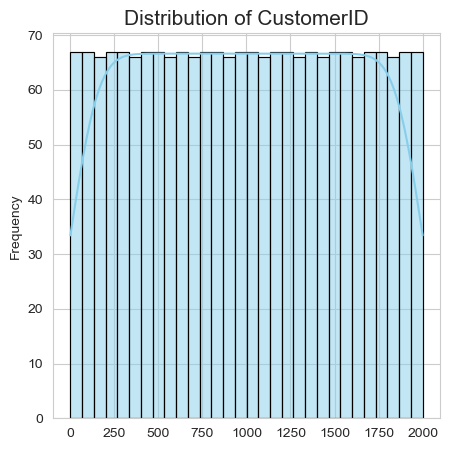

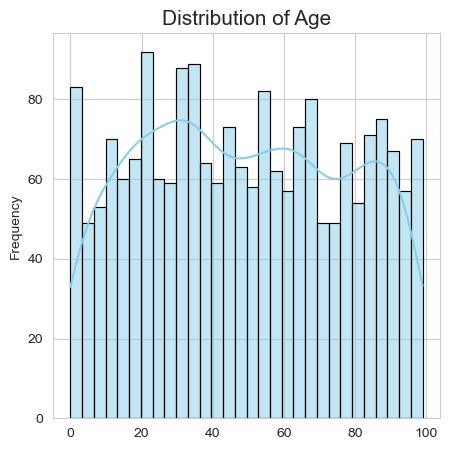

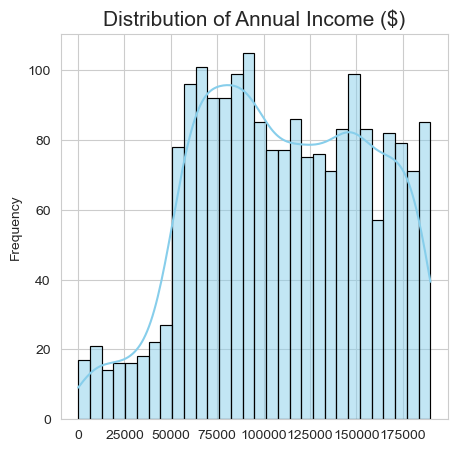

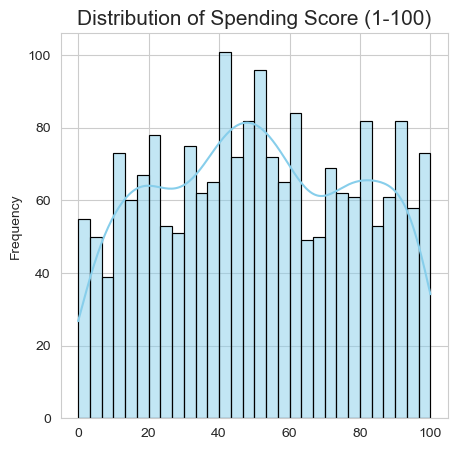

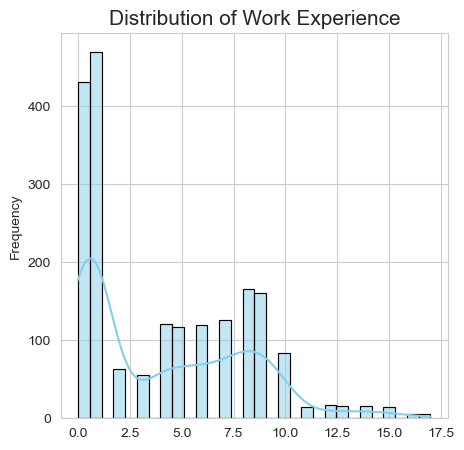

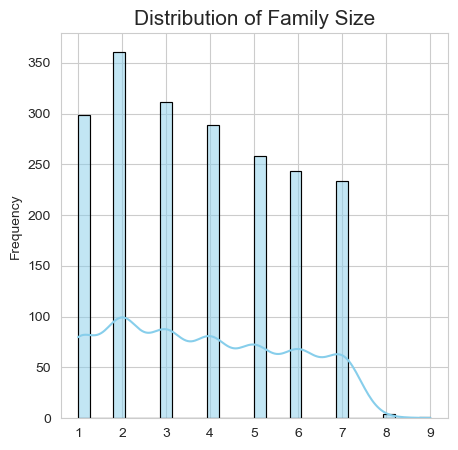

In [7]:
# Configuramos el estilo de los plots
sns.set_style("whitegrid")

# Escogemos las columnas numéricas
numerical_columns = customers.select_dtypes(include=['int64', 'float64']).columns

# Creamos histograms para cada una
for column in numerical_columns:
    plt.figure(figsize=(5, 5))
    sns.histplot(customers[column], kde=True, bins=10, color='skyblue', edgecolor='black')
    plt.title(f'Distribution of {column}', fontsize=15)
    plt.xlabel('')
    plt.ylabel('Frequency')
    plt.show()


In [9]:
# Revisamos también la distribución de las variables categóricas
customers.describe(include=object)

,Gender,Profession
count,2000,1965
unique,2,9
top,Female,Artist
freq,1186,612


In [10]:
# Revisamos los valores únicos de la variable Profession
customers.Profession.unique()

array(['Healthcare', 'Engineer', 'Lawyer', 'Entertainment', 'Artist',
       'Executive', 'Doctor', 'Homemaker', 'Marketing', nan], dtype=object)

Podría estandarizar las categorías de Gender y Profession a lower() y arreglar un poco los nombres de las columnas para facilitar su acceso.

### Pasos de limpieza y transformación resumidos:
1. Corregir nombre de columnas para quitar espacios y caracteres especiales
2. Remover duplicados si existen
3. Corregir tipo de datos, asegurando que customer_id, gender y profession sean string y categoricos
4. Formatear los valores de columnas categóricas para que estén todos en minúsculas
5. Chequear por valores nulos
6. Imputar valores nulos con la moda, ya que son un porcentaje bajo y se podría asumir que son aleatorios sin el riesgo de aportar mucho sesgo a los datos

In [11]:
# Importamos la función de limpieza final del script
from customer_analysis import clean_data
customers_clean = clean_data(customers)
customers_clean.head()

Formatting column names...

Removing duplicates...

Number of rows after removing duplicates: 2000

Correcting data types...
Data types after correction:
customer_id          object
gender             category
age                   int64
annual_income         int64
spending_score        int64
profession         category
work_experience       int64
family_size           int64
dtype: object

Formatting values in categorical columns...

Checking for missing values...
customer_id         0
gender              0
age                 0
annual_income       0
spending_score      0
profession         35
work_experience     0
family_size         0
dtype: int64

Imputing missing values in column 'profession' with the mode... 

Imputting missing values in column 'age' with the mode...

Cleaning done!
Formatting column names...

Removing duplicates...

Number of rows after removing duplicates: 2000

Correcting data types...
Data types after correction:
customer_id          object
gender             

,customer_id,gender,age,annual_income,spending_score,profession,work_experience,family_size
0,1,male,19.0,15000,39,healthcare,1,4
1,2,male,21.0,35000,81,engineer,3,3
2,3,female,20.0,86000,6,engineer,1,1
3,4,female,23.0,59000,77,lawyer,0,2
4,5,female,31.0,38000,40,entertainment,2,6
